# BCG treatment
In our cohort, 19 patients received BCG therapy. Of these patients, 7 were excluded due to absence of data on pre (1 patient) or post (6 patients) BCG treatment. In the remaining 12 patients, percentage of PD-L1+ cells (tumor cells and peritumoral lymphocytes), FOXP3+ lymphocytes (intratumoral and peritumoral lymphocytes) and CD8+/Ki67+ lymphocytes (intratumoral and peritumoral lymphocytes) were compared using the Wilcoxon signed-rank test with continuity correction. Biomarkers values were summarized using the maximum values per case across all TMAs.

In [1]:
# Libraries
suppressPackageStartupMessages(library(tidyverse))
library(lubridate)

# Global
options(warn = -1)

# Scripts
source("summaries.R")

# Data
load("df.Rdata")

# Selection of patients with paired pre/post BCG data
bcg_paired  <- c(
    "07-S-3788",
    "07-S-4995", 
    "05-S-8559",
    "06-S-836",
    "07-S-11636",
    "07-S-6971",
    "04-S-6743",
    "05-S-503",
    "04-S-7892",
    "06-S-2774",
    "05-S-8243",
    "05-S-9578",
    "05-S-8618",
    "06-S-1891",
    "06-S-9899",
    "07-S-3016",
    "08-S-11218",
    "09-S-708",
    "09-S-3345",
    "09-S-5756",
    "09-S-10299",
    "09-S-9215",
    "09-S-12139",
    "11-S-1372"
)

# Selecting cases with BCG treatment
DF_BCG <- DATA %>% 
    filter(
        bcg == "Yes",
        sp_id %in% bcg_paired
    ) %>% 
    group_by(
        patient_id,
        sp_id
    ) %>% 
    summarize(
        sp_date = unique(sp_date),
        bcg_date = unique(bcg_date),
        biopsy_timing = unique(biopsy_timing),
        pdl1_tumor = quantile(pdl1_tumor, probs = 1, na.rm = TRUE),
        pdl1_lymph = quantile(pdl1_stroma, probs = 1, na.rm = TRUE),
        foxp3_intratumoral = quantile(foxp3_lymph_tumor, probs = 1, na.rm = TRUE),
        foxp3_peritumoral = quantile(foxp3_lymph_stroma, probs = 1, na.rm = TRUE),
        cd8_intratumoral = quantile(cd8_tumor_count, probs = 1, na.rm = TRUE),
        cd8ki67_intratumoral = quantile(cd8ki67_tumor_count, probs = 1, na.rm = TRUE),
        cd8_peritumoral = quantile(cd8_stroma_count, probs = 1, na.rm = TRUE),
        cd8ki67_peritumoral = quantile(cd8ki67_stroma_count, probs = 1, na.rm = TRUE)
    )

glimpse(DF_BCG)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Observations: 24
Variables: 13
Groups: patient_id [12]
$ patient_id           <int> 3, 3, 8, 8, 9, 9, 15, 15, 17, 17, 23, 23, 25, 25…
$ sp_id                <fct> 07-S-3788, 07-S-4995, 05-S-8559, 06-S-836, 07-S-…
$ sp_date              <date> 2007-04-17, 2007-05-17, 2005-10-24, 2006-01-31,…
$ bcg_date             <date> 2007-04-17, 2007-04-17, 2005-11-14, 2005-11-14,…
$ biopsy_timing        <ord> Pre BCG, Post BCG, Pre BCG, Post BCG, Post BCG, …
$ pdl1_tumor           <dbl> 7.1, 0.0, 10.0, 10.0, NA, 0.0, 0.0, 14.5, 100.0,…
$ pdl1_lymph           <dbl> 10, NA, 5, 40, NA, 10, NA, 5, 0, 0, NA, NA, 20, …
$ foxp3_intratumoral   <dbl> 1, 0, 1, 4, 0, 0, 2, 8, 0, 0, 0, NA, 25, 66, 4, …
$ foxp3_peritumoral    <dbl> 95, 19, 153, 105, 0, 33, 3, 190, 6, 7, 3, 19, 28…
$ cd8_intratumoral     <dbl> 0, 0, 3, 137, NA, 5, 3, 17, 20, 1, 13, NA, 20, 5…
$ cd8ki67_intratumoral <dbl> 0, 0, 0, 3, NA, 0, 0, 1, 0, 0, 0, NA, 1, 2, 1, 1…
$ cd8_peritumoral      <dbl> 160, 17, 62, 163, NA, 40, 3, 58, 12, 46, 5, 164

## PD-L1 in tumor cells


	Wilcoxon signed rank test with continuity correction

data:  Pre and Post
V = 9, p-value = 0.8339
alternative hypothesis: true location shift is not equal to 0



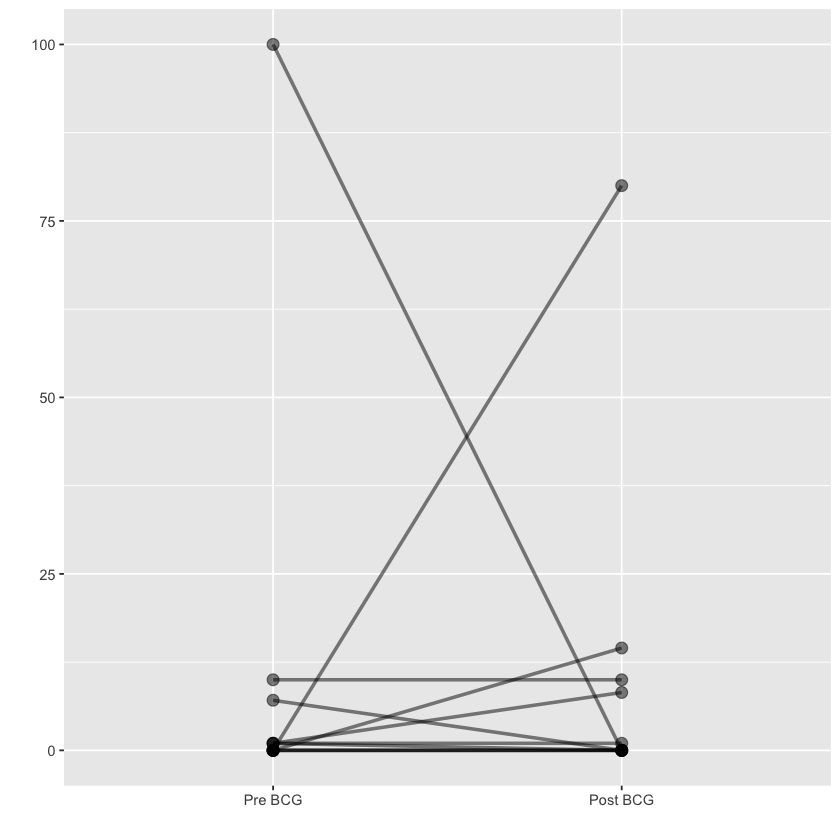

In [2]:
DF_BCG %>% compare_ts(biopsy_timing, pdl1_tumor, patient_id)

## PD-L1 in peritumoral lymphocytes


	Wilcoxon signed rank test with continuity correction

data:  Pre and Post
V = 1, p-value = 0.1056
alternative hypothesis: true location shift is not equal to 0



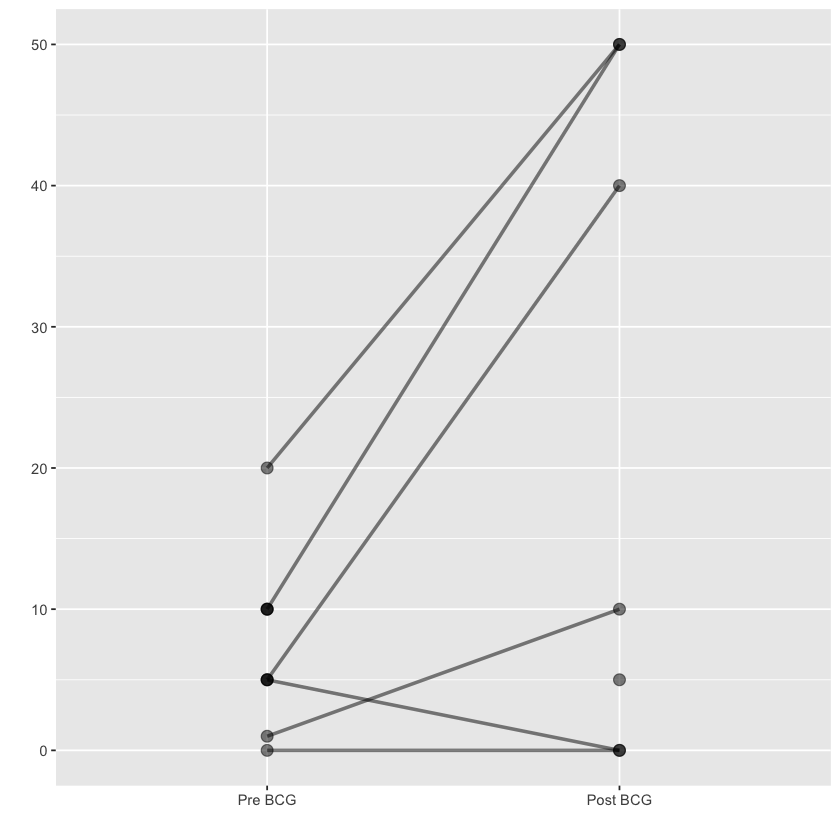

In [3]:
DF_BCG %>% compare_ts(biopsy_timing, pdl1_lymph, patient_id)

## FOXP3 in intratumoral lymphocytes


	Wilcoxon signed rank test with continuity correction

data:  Pre and Post
V = 6, p-value = 0.1069
alternative hypothesis: true location shift is not equal to 0



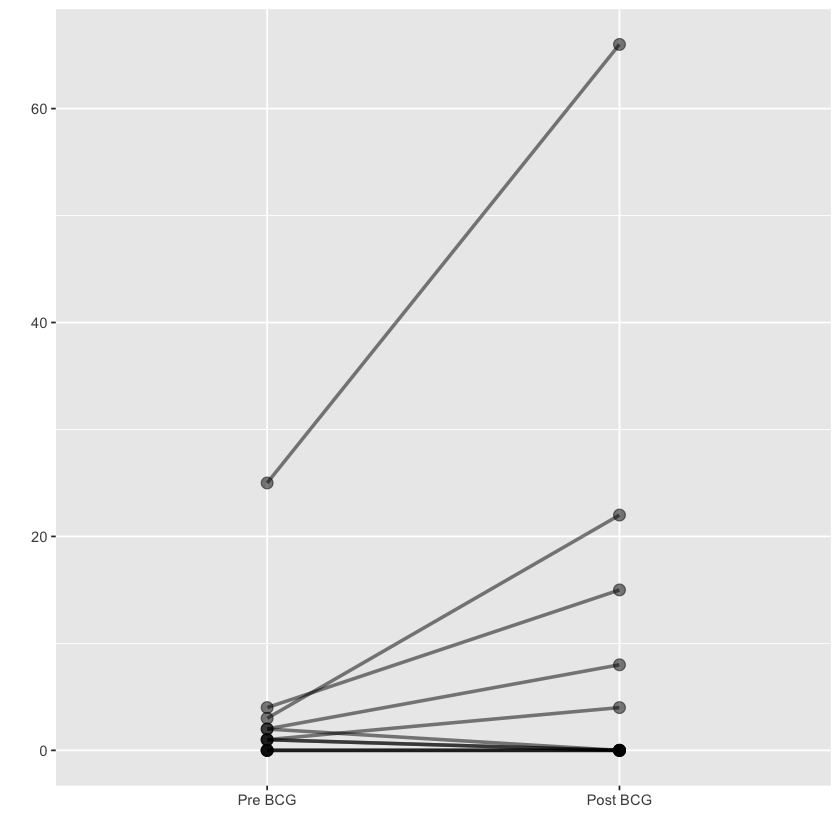

In [4]:
DF_BCG %>% compare_ts(biopsy_timing, foxp3_intratumoral, patient_id)

## FOXP3 in peritumoral lymphocytes


	Wilcoxon signed rank test with continuity correction

data:  Pre and Post
V = 28.5, p-value = 0.4326
alternative hypothesis: true location shift is not equal to 0



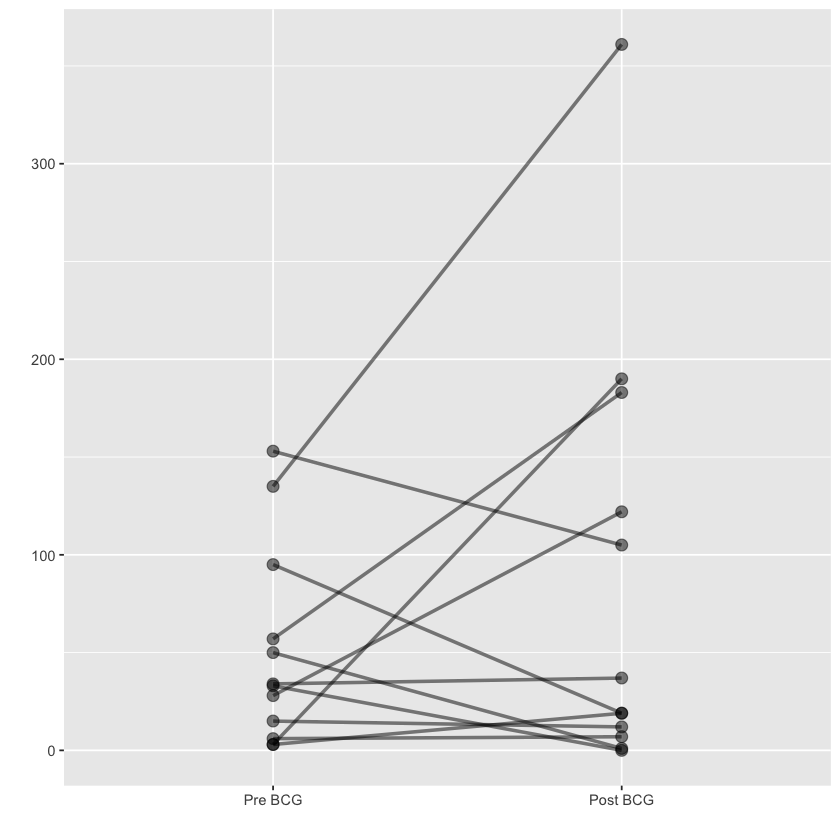

In [5]:
DF_BCG %>% compare_ts(biopsy_timing, foxp3_peritumoral, patient_id)

## CD8 in intratumoral lymphocytes


	Wilcoxon signed rank test with continuity correction

data:  Pre and Post
V = 5, p-value = 0.1508
alternative hypothesis: true location shift is not equal to 0



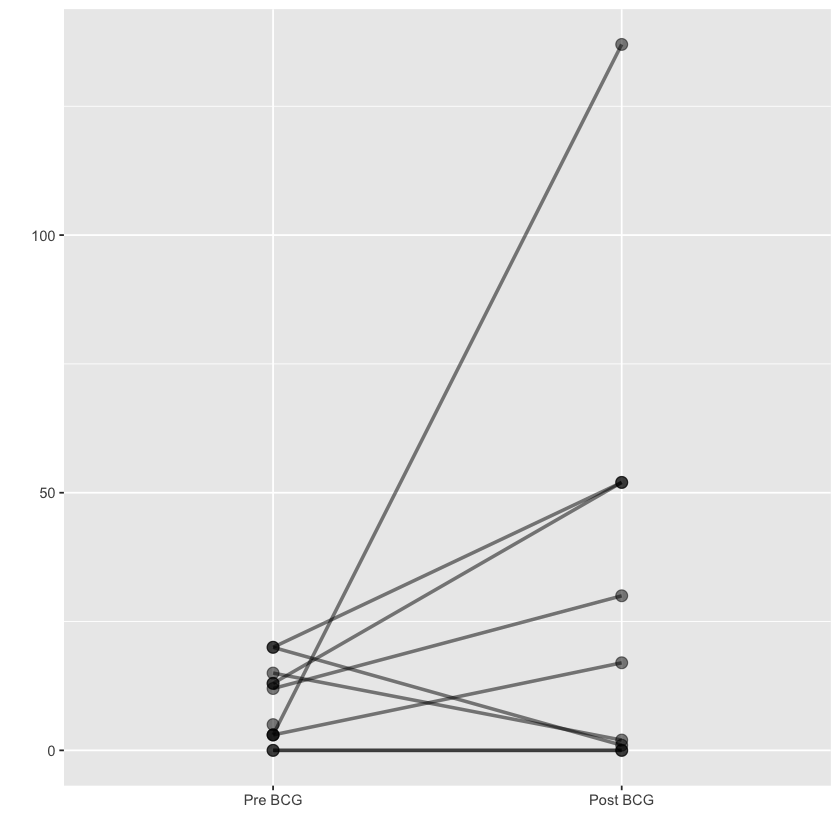

In [6]:
DF_BCG %>% compare_ts(biopsy_timing, cd8_intratumoral, patient_id)

## CD8 in peritumoral lymphocytes


	Wilcoxon signed rank test

data:  Pre and Post
V = 14, p-value = 0.1016
alternative hypothesis: true location shift is not equal to 0



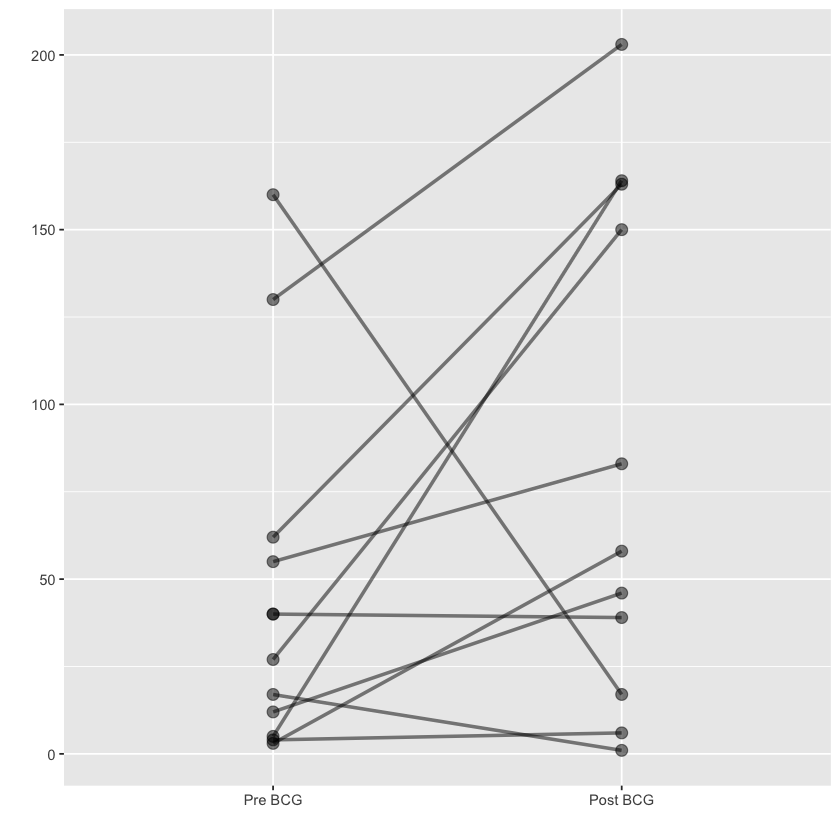

In [7]:
DF_BCG %>% compare_ts(biopsy_timing, cd8_peritumoral, patient_id)

## CD8/Ki67 in intratumoral lymphocytes


	Wilcoxon signed rank test with continuity correction

data:  Pre and Post
V = 0, p-value = 0.1736
alternative hypothesis: true location shift is not equal to 0



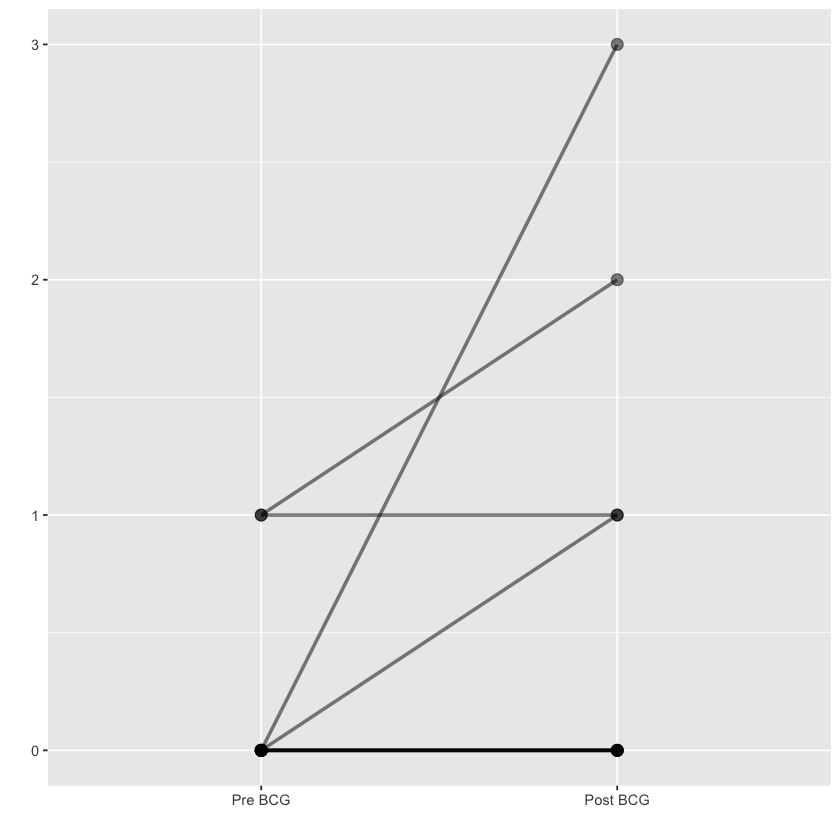

In [8]:
DF_BCG %>% compare_ts(biopsy_timing, cd8ki67_intratumoral, patient_id)

## CD8/Ki67 in peritumoral lymphocytes


	Wilcoxon signed rank test with continuity correction

data:  Pre and Post
V = 2, p-value = 0.7728
alternative hypothesis: true location shift is not equal to 0



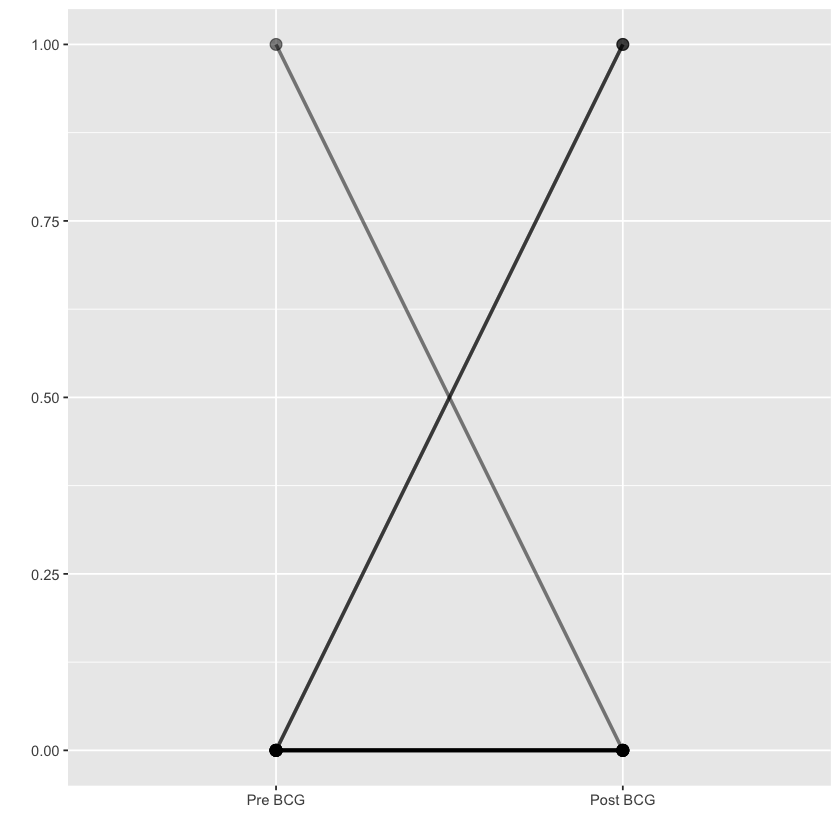

In [9]:
DF_BCG %>% compare_ts(biopsy_timing, cd8ki67_peritumoral, patient_id)